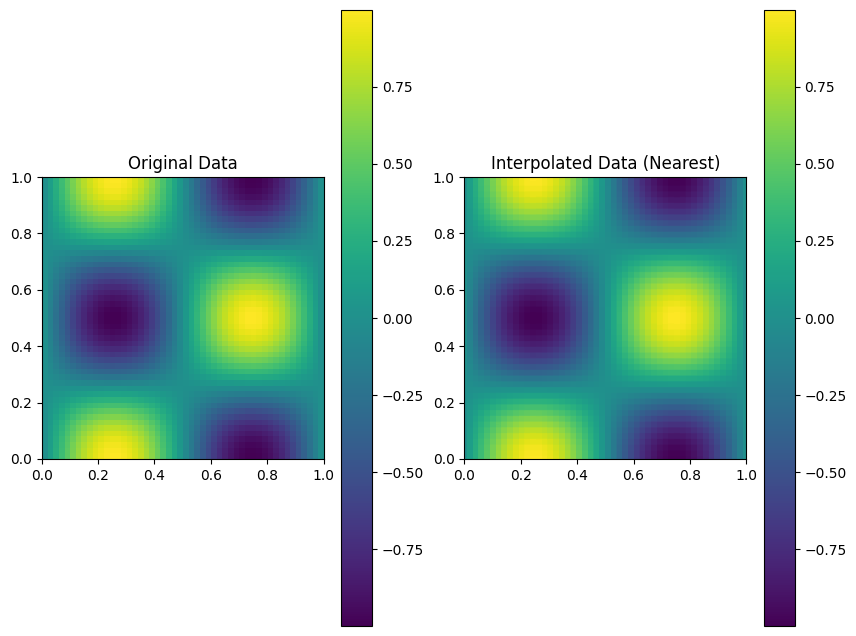

CPU times: user 3.58 s, sys: 2.7 s, total: 6.27 s
Wall time: 7.33 s


In [50]:
%%time

import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Create interpolator
interpolator = RegularGridInterpolator((x, y), Z, method='nearest')

# Define new grid points
x_new = np.linspace(0, 1, 10000)
y_new = np.linspace(0, 1, 10000)
X_new, Y_new = np.meshgrid(x_new, y_new)

# Perform interpolation
points = np.array([Y_new.ravel(), X_new.ravel()]).T
Z_new = interpolator(points).reshape(X_new.shape)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Interpolated Data (Nearest)')
plt.imshow(Z_new, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.show()

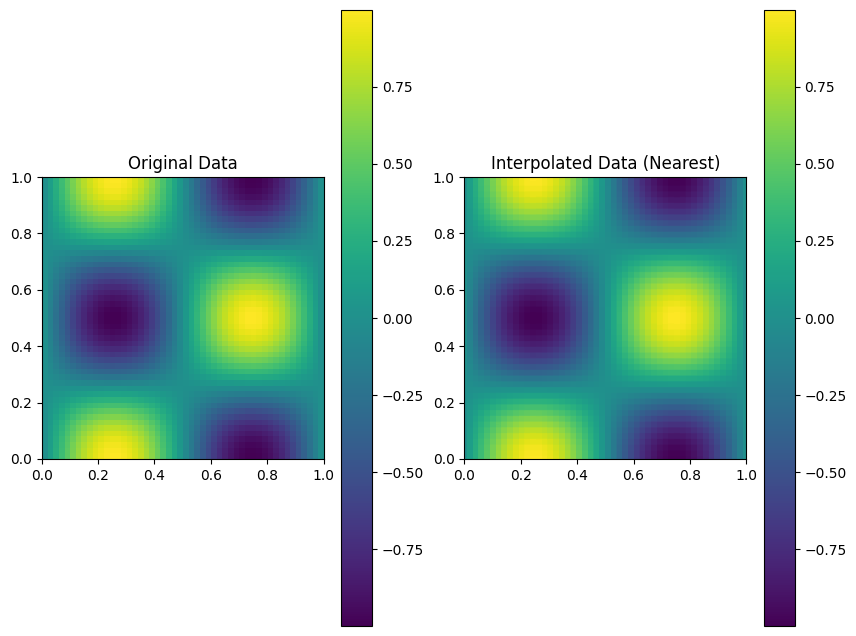

CPU times: user 3.33 s, sys: 1.59 s, total: 4.92 s
Wall time: 5.1 s


In [48]:
%%time

import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Define new grid points
x_new = np.linspace(0, 1, 10000)
y_new = np.linspace(0, 1, 10000)
X_new, Y_new = np.meshgrid(x_new, y_new)

# Compute indices for the new grid points
coords_x = np.interp(X_new.ravel(), x, np.arange(len(x)))
coords_y = np.interp(Y_new.ravel(), y, np.arange(len(y)))

# Perform nearest-neighbor interpolation
Z_new = map_coordinates(Z, [coords_y, coords_x], order=0, mode='nearest').reshape(X_new.shape)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Interpolated Data (Nearest)')
plt.imshow(Z_new, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.show()

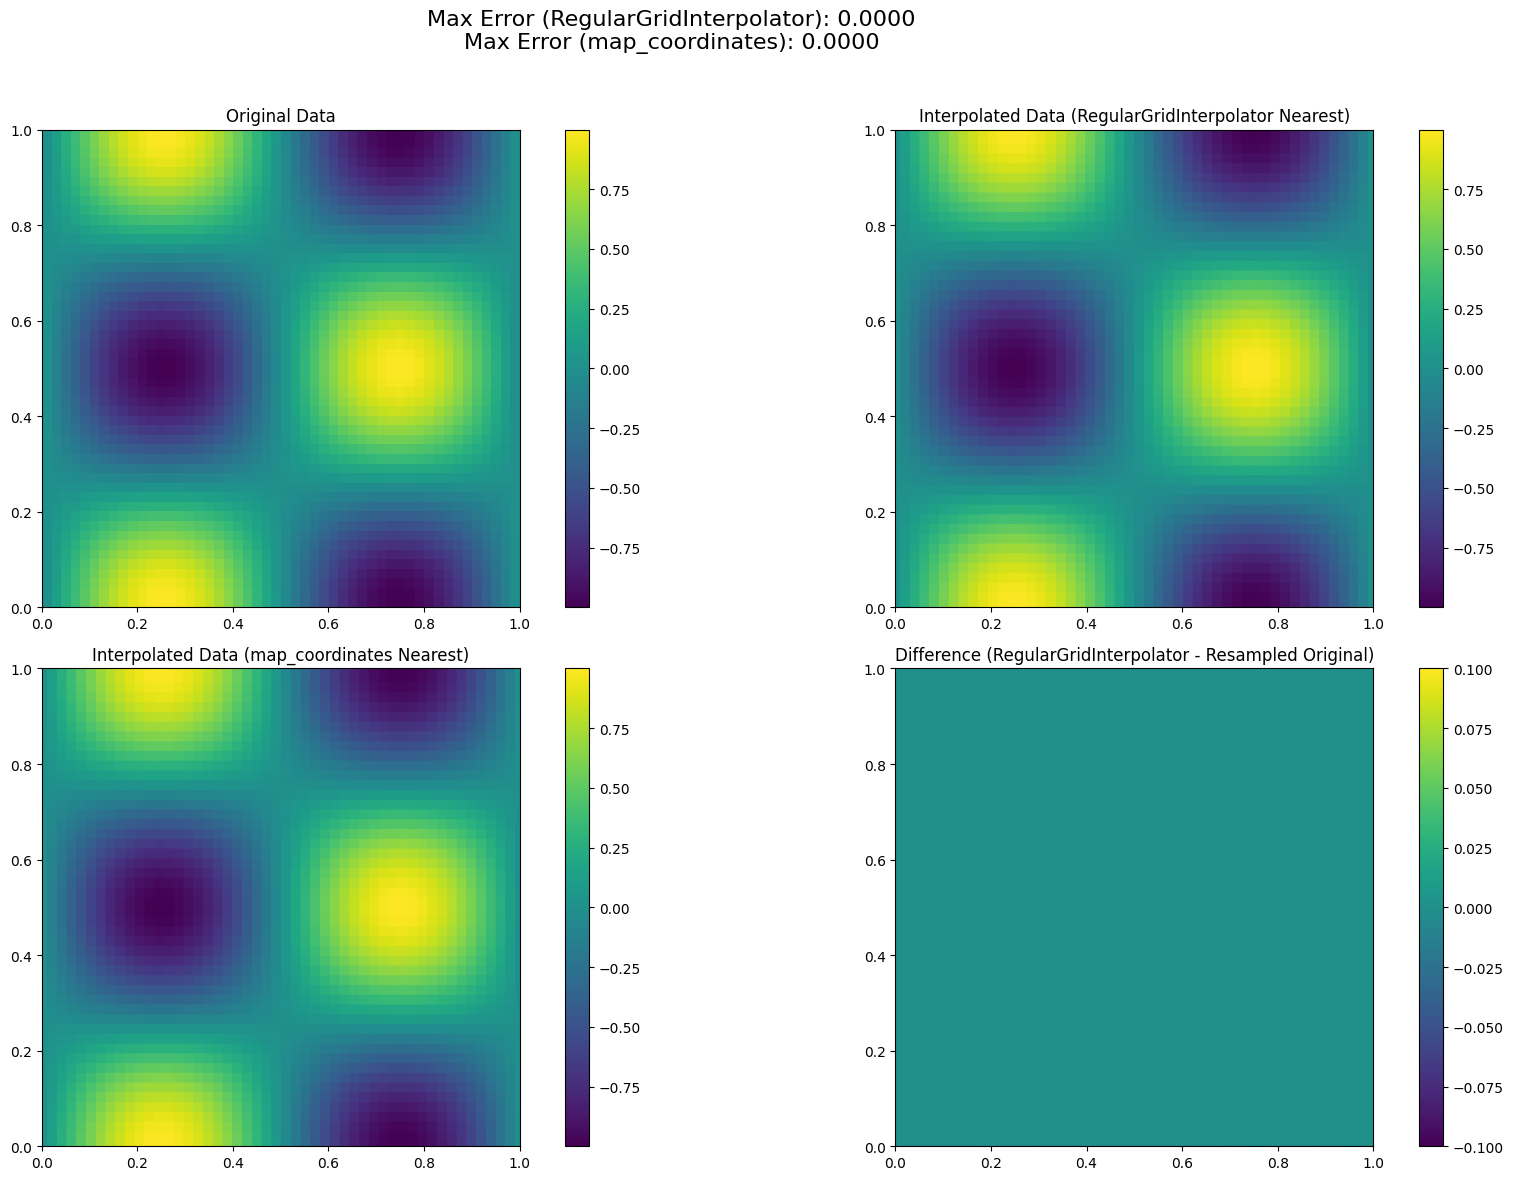

CPU times: user 9.56 s, sys: 5.32 s, total: 14.9 s
Wall time: 17.2 s


In [55]:
%%time

import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Define grid
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Define new grid points
x_new = np.linspace(0, 1, 10000)
y_new = np.linspace(0, 1, 10000)
X_new, Y_new = np.meshgrid(x_new, y_new)

# RegularGridInterpolator with Nearest Neighbor
interpolator_nn = RegularGridInterpolator((x, y), Z, method='nearest')
points_nn = np.array([Y_new.ravel(), X_new.ravel()]).T
Z_new_nn = interpolator_nn(points_nn).reshape(X_new.shape)

# map_coordinates with Nearest Neighbor
coords_x = np.interp(X_new.ravel(), x, np.arange(len(x)))
coords_y = np.interp(Y_new.ravel(), y, np.arange(len(y)))
Z_new_map = map_coordinates(Z, [coords_y, coords_x], order=0, mode='nearest').reshape(X_new.shape)

# Resample Z to match the new grid resolution
Z_resampled = zoom(Z, (10000/50, 10000/50), order=0)

# Calculate the difference and error measures
difference_nn = Z_new_nn - Z_resampled
difference_map = Z_new_map - Z_resampled
error_nn = np.max(np.abs(difference_nn))
error_map = np.max(np.abs(difference_map))

# Display results
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Interpolated Data (RegularGridInterpolator Nearest)')
plt.imshow(Z_new_nn, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Interpolated Data (map_coordinates Nearest)')
plt.imshow(Z_new_map, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title('Difference (RegularGridInterpolator - Resampled Original)')
plt.imshow(difference_nn, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.suptitle(f"Max Error (RegularGridInterpolator): {error_nn:.4f}\nMax Error (map_coordinates): {error_map:.4f}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

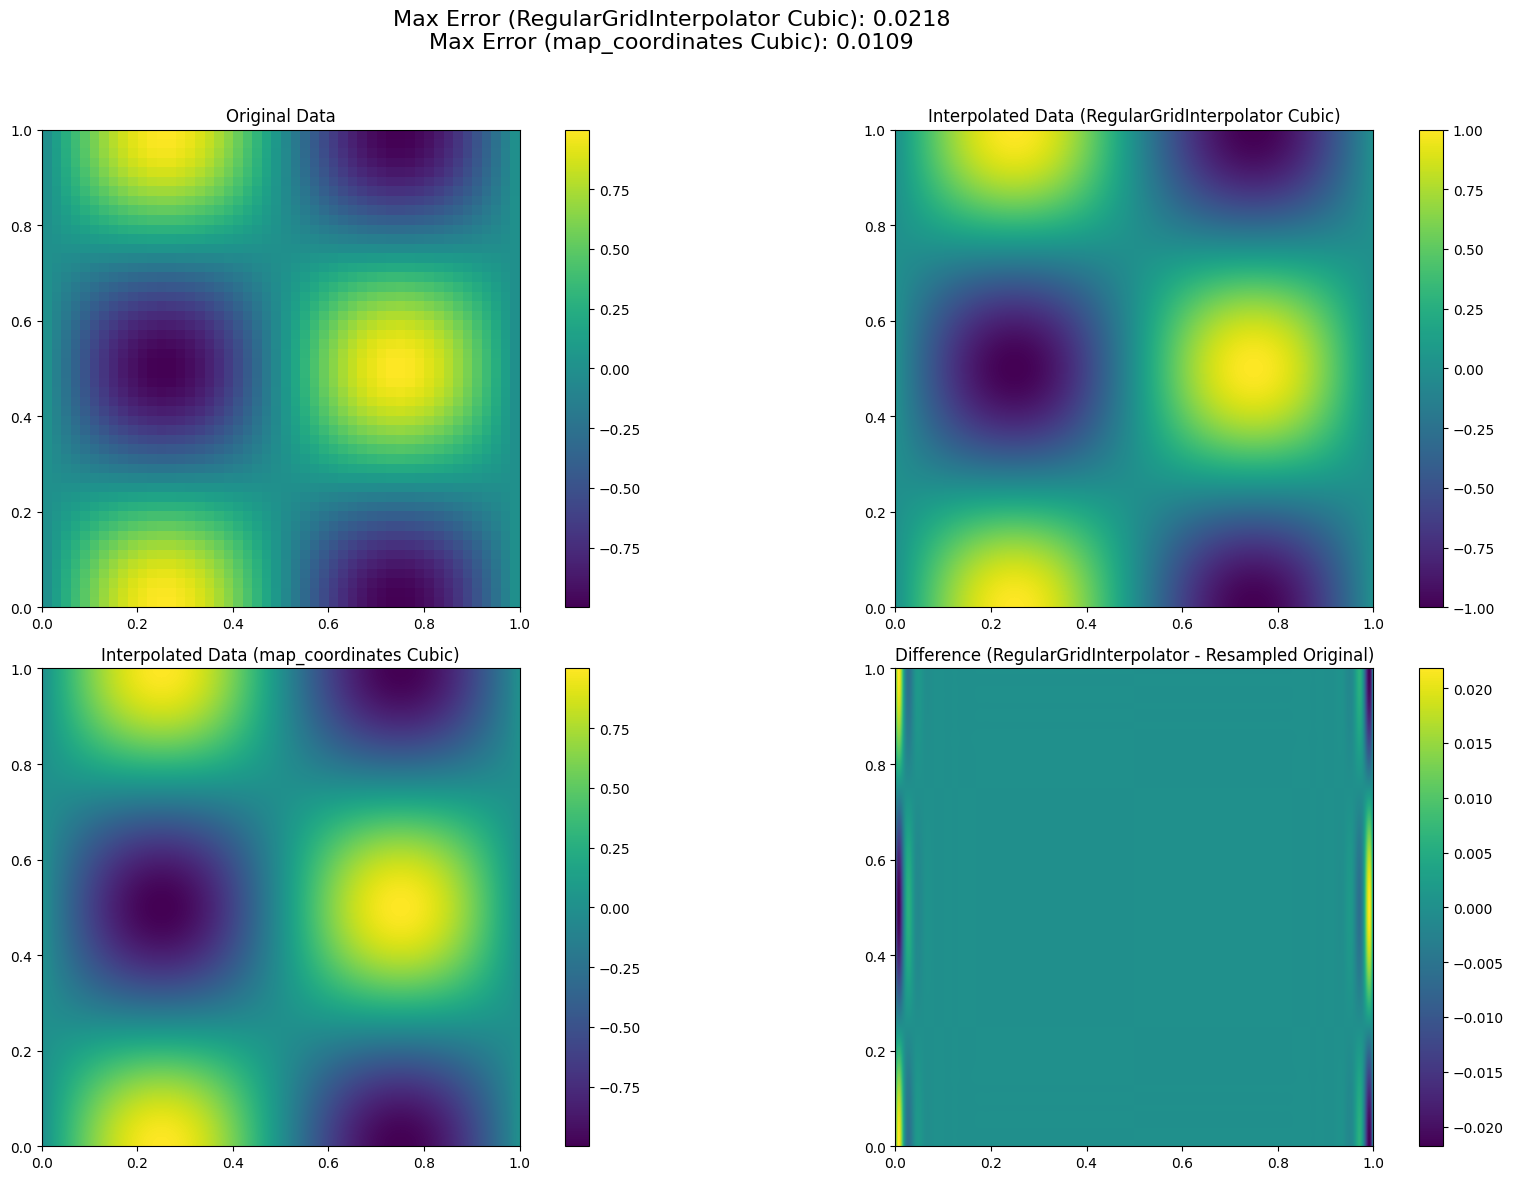

CPU times: user 47 s, sys: 6.25 s, total: 53.2 s
Wall time: 55.8 s


In [56]:
%%time

import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Define grid
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Define new grid points
x_new = np.linspace(0, 1, 10000)
y_new = np.linspace(0, 1, 10000)
X_new, Y_new = np.meshgrid(x_new, y_new)

# RegularGridInterpolator with Cubic
interpolator_cubic = RegularGridInterpolator((x, y), Z, method='cubic')
points_cubic = np.array([Y_new.ravel(), X_new.ravel()]).T
Z_new_cubic = interpolator_cubic(points_cubic).reshape(X_new.shape)

# map_coordinates with Cubic
coords_x = np.interp(X_new.ravel(), x, np.arange(len(x)))
coords_y = np.interp(Y_new.ravel(), y, np.arange(len(y)))
Z_new_map_cubic = map_coordinates(Z, [coords_y, coords_x], order=3, mode='nearest').reshape(X_new.shape)

# Resample Z to match the new grid resolution
Z_resampled = zoom(Z, (10000/50, 10000/50), order=3)

# Calculate the difference and error measures
difference_cubic = Z_new_cubic - Z_resampled
difference_map_cubic = Z_new_map_cubic - Z_resampled
error_cubic = np.max(np.abs(difference_cubic))
error_map_cubic = np.max(np.abs(difference_map_cubic))

# Display results
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Interpolated Data (RegularGridInterpolator Cubic)')
plt.imshow(Z_new_cubic, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Interpolated Data (map_coordinates Cubic)')
plt.imshow(Z_new_map_cubic, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title('Difference (RegularGridInterpolator - Resampled Original)')
plt.imshow(difference_cubic, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.suptitle(f"Max Error (RegularGridInterpolator Cubic): {error_cubic:.4f}\nMax Error (map_coordinates Cubic): {error_map_cubic:.4f}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

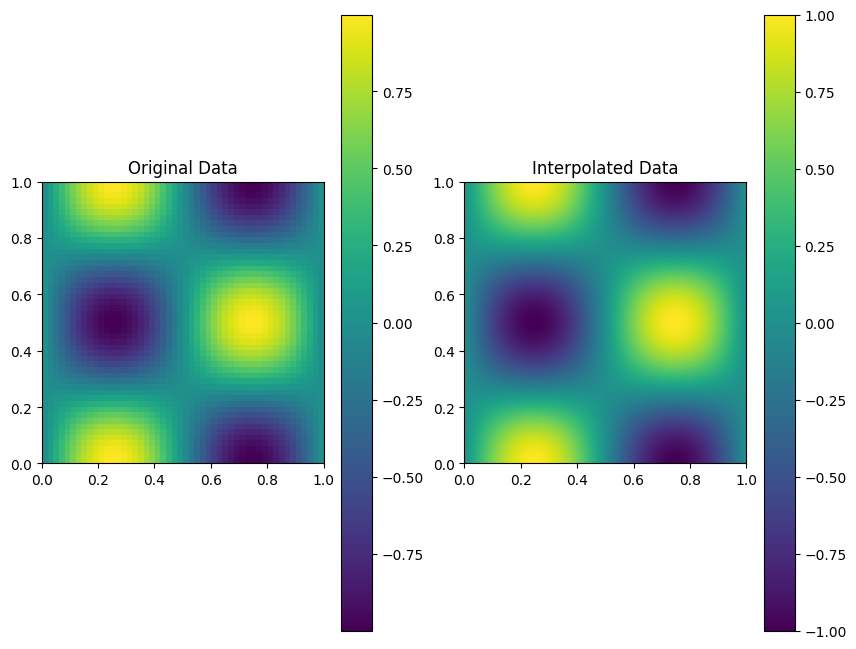

CPU times: user 2.5 s, sys: 457 ms, total: 2.96 s
Wall time: 2.52 s


In [60]:
%%time

import numpy as np
from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Create interpolator
interpolator = CloughTocher2DInterpolator(np.array([X.ravel(), Y.ravel()]).T, Z.ravel())

# Define new grid points
x_new = np.linspace(0, 1, 4000)
y_new = np.linspace(0, 1, 4000)
X_new, Y_new = np.meshgrid(x_new, y_new)
points = np.array([X_new.ravel(), Y_new.ravel()]).T

# Perform interpolation
Z_new = interpolator(points).reshape(X_new.shape)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Interpolated Data')
plt.imshow(Z_new, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

plt.show()

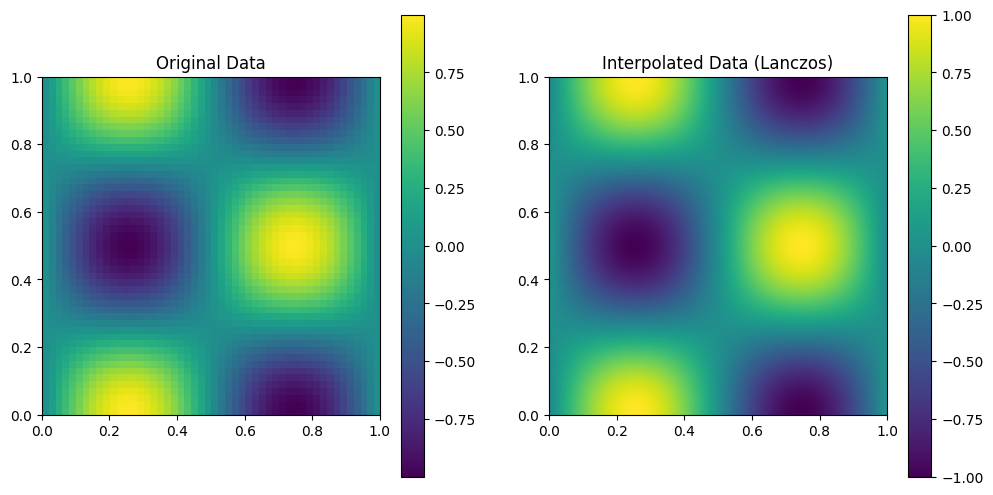

CPU times: user 1.06 s, sys: 68.5 ms, total: 1.13 s
Wall time: 603 ms


In [59]:
%%time

import numpy as np
import cv2
import matplotlib.pyplot as plt

import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['TBB_MAX_THREAD'] = '1'

# Set the number of threads for OpenCV
cv2.setNumThreads(1)

# Define grid
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Define new grid size (output size)
new_size = (4000, 4000)  # (width, height)

# Perform Lanczos interpolation using OpenCV directly on float data
#https://stackoverflow.com/questions/23853632/which-kind-of-interpolation-best-for-resizing-image
Z_resized = cv2.resize(Z, new_size, interpolation=cv2.INTER_LANCZOS4) # Wall time: 1.42 s
#Z_resized = cv2.resize(Z, new_size, interpolation=cv2.INTER_CUBIC) # Wall time: 1.38 s
#Z_resized = cv2.resize(Z, new_size, interpolation=cv2.INTER_NEAREST) #Wall time: 1.71 s

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Interpolated Data (Lanczos)')
plt.imshow(Z_resized, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar()

plt.show()

#Wall time: 570 ms


In [115]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import time

# Define grid
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Define new grid points
x_new = np.linspace(0, 1, 4000)
y_new = np.linspace(0, 1, 4000)
X_new, Y_new = np.meshgrid(x_new, y_new)
points = np.array([X_new.ravel(), Y_new.ravel()]).T

# Measure time for interpolation
start = time.time()
# output data type is still float64
interpolator = RegularGridInterpolator((x, y), Z.astype(np.float32), method='cubic')
Z_new = interpolator(points).reshape(X_new.shape)
end = time.time()

print("SciPy Cubic Interpolation Time (float32 -> float64):", end - start)

SciPy Cubic Interpolation Time (float32): 13.683626890182495


In [141]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import time

# Define grid
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

Z_uint16 = (Z_normalized * 65535).astype(np.uint16)
#print (np.nanmin(Z_uint16), np.nanmax(Z_uint16))

# Define new grid points
x_new = np.linspace(0, 1, 4000)
y_new = np.linspace(0, 1, 4000)
X_new, Y_new = np.meshgrid(x_new, y_new)
points = np.array([X_new.ravel(), Y_new.ravel()]).T

# Measure time for interpolation
start = time.time()
# output data type is still float64
interpolator = RegularGridInterpolator((x, y), Z_uint16, method='cubic')
Z_new = interpolator(points).reshape(X_new.shape)
end = time.time()

print("SciPy Cubic Interpolation Time (uint16 -> float64):", end - start)

SciPy Cubic Interpolation Time (uint16 -> float64): 21.138999223709106


OpenCV Lanczos Interpolation Time: 0.03250694274902344


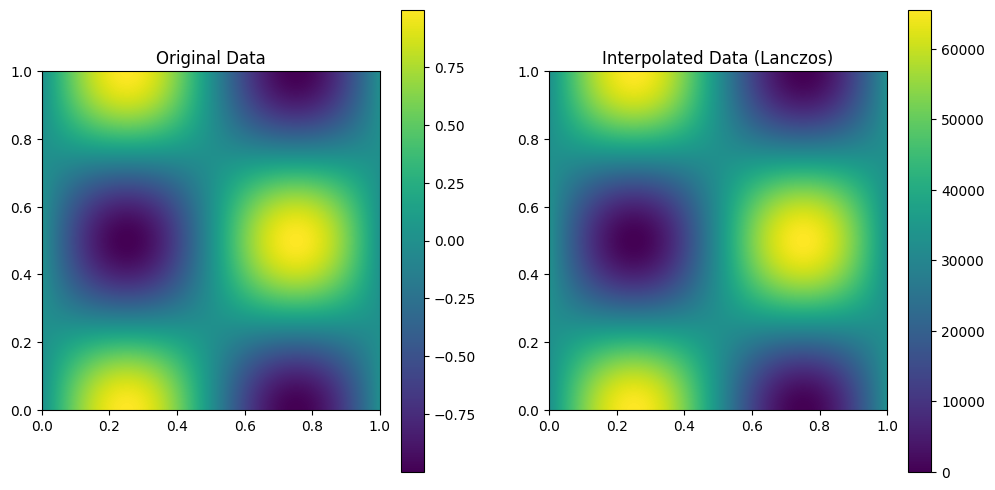

In [120]:
import cv2
import numpy as np
import time

# Define grid
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Convert Z to uint8 for OpenCV (or other appropriate format if needed)
Z_uint16 = cv2.normalize(Z, None, 0, 2**16-1, cv2.NORM_MINMAX).astype(np.uint16)

# Define new grid points
x_new = np.linspace(0, 1, 4000)
y_new = np.linspace(0, 1, 4000)
Z_new_shape = (len(y_new), len(x_new))

# Measure time for interpolation
start = time.time()
Z_new = cv2.resize(Z_uint16, (Z_new_shape[1], Z_new_shape[0]), interpolation=cv2.INTER_LANCZOS4)
end = time.time()

print("OpenCV Lanczos Interpolation Time:", end - start)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Interpolated Data (Lanczos)')
plt.imshow(Z_new, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar()

plt.show()

OpenCV Lanczos Interpolation Time: 0.04057598114013672


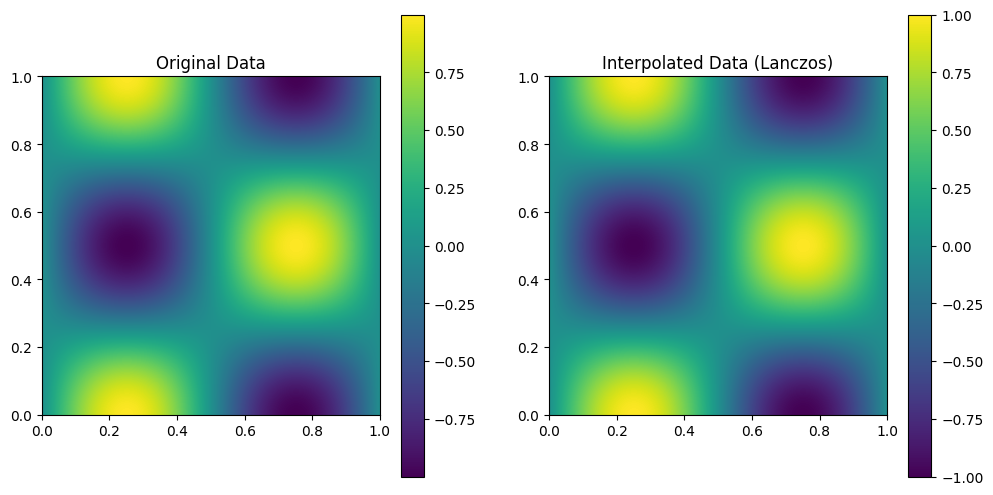

In [131]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Convert Z to float32
Z_float32 = Z.astype(np.float32)

# Define new grid points
x_new = np.linspace(0, 1, 4000)
y_new = np.linspace(0, 1, 4000)
Z_new_shape = (len(y_new), len(x_new))

# Measure time for interpolation
start = time.time()
Z_new = cv2.resize(Z_float32, (Z_new_shape[1], Z_new_shape[0]), interpolation=cv2.INTER_LANCZOS4)
end = time.time()

print("OpenCV Lanczos Interpolation Time:", end - start)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Interpolated Data (Lanczos)')
plt.imshow(Z_new, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar()

plt.show()

OpenCV Cubic Interpolation Time: 0.12502002716064453


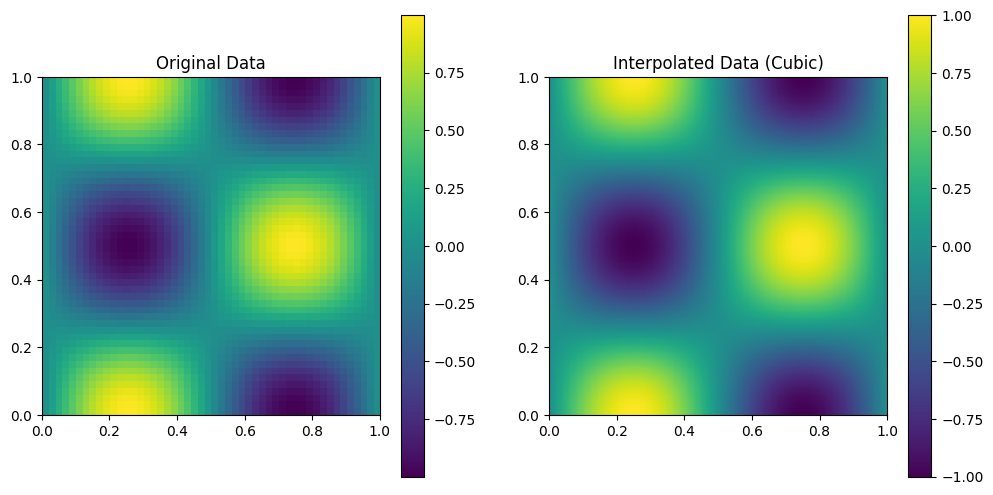

In [140]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

# Convert Z to float32
Z_float32 = Z.astype(np.float32)

# Define new grid points
x_new = np.linspace(0, 1, 4000)
y_new = np.linspace(0, 1, 4000)

# Create mapping arrays for cv2.remap
map_x, map_y = np.meshgrid(np.linspace(0, Z.shape[1] - 1, len(x_new)),
                           np.linspace(0, Z.shape[0] - 1, len(y_new)),
                           indexing='xy')

# Convert to float32 for remap
map_x = map_x.astype(np.float32)
map_y = map_y.astype(np.float32)

# Measure time for interpolation using remap
start = time.time()
Z_new = cv2.remap(Z_float32, map_x, map_y, interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REFLECT)
end = time.time()

print("OpenCV Cubic Interpolation Time:", end - start)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Interpolated Data (Cubic)')
plt.imshow(Z_new, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar()

plt.show()